<a href="https://colab.research.google.com/github/Komal-londhe/NLP_SentimentAnalysis/blob/main/NLP_StakingML_Final_PART_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [ ]:
data = pd.read_csv("/content/sample_data/Transformer_Data.csv")
data_visualize = pd.read_csv("/content/sample_data/TransformerData.csv")

In [ ]:
data.drop(columns="Unnamed: 0",inplace=True)
data

,summary_text,sentiment,sentiment score,intent,intent score
0,The result of your review is based on your mi...,NEGATIVE,0.999430,Quit Services,0.259895
1,"I was on a business trip in XXXX, my co worke...",NEGATIVE,0.999074,Security Concern,0.465241
2,"""I applied for the Chase Freedom Account onli...",NEGATIVE,0.999711,Security Concern,0.559970
3,A check was issued by Barclays Bank Delaware ...,NEGATIVE,0.997905,Security Concern,0.362701
4,"A woman ordered some clothing online, two pur...",NEGATIVE,0.999709,Functionality Concern,0.286113
...,...,...,...,...,...
695,Card.COM refuses to re issue a new card for m...,NEGATIVE,0.997826,Functionality Concern,0.332786
696,Capital One has been hiding/misleading I and ...,NEGATIVE,0.999551,Functionality Concern,0.278592
697,"In XX/XX/XXXX, my daughter took a look at her...",NEGATIVE,0.998420,Security Concern,0.413627
698,Last year I called to cancel the credit card ...,NEGATIVE,0.998284,Overcharged,0.302814


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   summary_text     700 non-null    object 
 1   sentiment        700 non-null    object 
 2   sentiment score  700 non-null    float64
 3   intent           700 non-null    object 
 4   intent score     700 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.5+ KB


In [ ]:
import matplotlib.pyplot as plt

value_counts = data_visualize['emotions'].value_counts(dropna=True, sort=True)
df_emo = pd.DataFrame(value_counts)
df_emo = df_emo.reset_index()
df_emo.columns = ['unique_values', 'counts'] # change column names
df_emo

,unique_values,counts
0,fearful,112
1,angry,112
2,sad,34
3,excited,31
4,happy,6
5,indifferent,5


In [ ]:
# Pie-chart [Distribution by categories of emotions]
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df_emo.unique_values, values= df_emo.counts)], layout=go.Layout(title=go.layout.Title(text="Percentage of emotions from complaints")))
fig.show()

In [ ]:
import matplotlib.pyplot as plt

value_counts = data_visualize['intent'].value_counts(dropna=True, sort=True)
df_int = pd.DataFrame(value_counts)
df_int = df_int.reset_index()
df_int.columns = ['unique_values', 'counts'] # change column names
df_int

,unique_values,counts
0,Functionality Concern,35
1,Overcharged,31
2,Security Concern,21
3,Not Benefited,8
4,Quit Services,5


In [ ]:
# Pie-chart [Distribution by categories of intent] 
fig = go.Figure(data=[go.Pie(labels=df_int.unique_values, values= df_int.counts )], layout=go.Layout(title=go.layout.Title(text="Percentage of intent from complaints")))
fig.show()

In [ ]:
# Stacked Bar Plot of Emotion Categories for individual intent
import plotly.express as px
fig = px.bar(data_visualize, x="intent", y="intent score", color="emotions")
fig.show()

In [ ]:
# Bar plot for negative and positive for each intent category
fig = px.bar(data_visualize, x='intent', y='sentiment score',
             color='sentiment', barmode='group')
fig.show()

In [ ]:
# Overall negative and positive counts
fig = px.bar(data_visualize, x='sentiment', y='sentiment score',
             color='intent', barmode='group')
fig.show()

In [ ]:
import pandas as pd 
import numpy as np 
import re 
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from numpy import array 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tag_re = re.compile(r'<[^>]+>')
def remove_tags(document): 
    return tag_re.sub(' ', document)
def clean_text(doc): 
    document = remove_tags(doc) 
    document = re.sub('[^a-zA-Z]', ' ', document) 
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document) 
    document = re.sub(r'\s+[XXXX]',' ', document)
    document = re.sub(r'\s+[XXX]',' ', document)
    document = re.sub(r'\s+[X]',' ', document)

    return document

In [ ]:
data['summary_text']=data['summary_text'].apply(clean_text) 

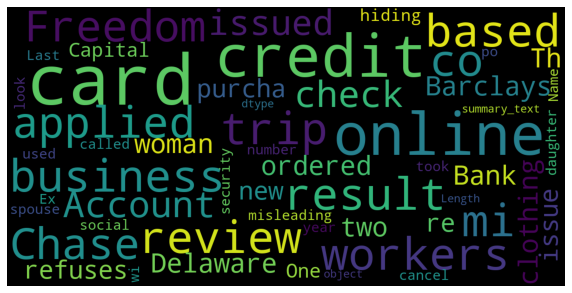

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 200,
        max_font_size = 50, 
        scale = 3,
        random_state = 35 
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 16)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data['summary_text'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
print("Columns encoded")
for col in data.columns[1:]:
    if data[col].dtype == 'object':
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
            print(col)
print('{} columns were label encoded.'.format(le_count))

Columns encoded
sentiment
intent
2 columns were label encoded.


In [ ]:
X_dt = data['summary_text']
Y = data['intent']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
X = cv.fit_transform(X_dt) 
X = X.toarray()

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [01:03<00:00,  2.18s/it]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.57               0.34    None      0.56   
DecisionTreeClassifier             0.50               0.34    None      0.50   
NearestCentroid                    0.57               0.34    None      0.55   
RandomForestClassifier             0.59               0.33    None      0.55   
LGBMClassifier                     0.56               0.33    None      0.55   
BernoulliNB                        0.58               0.32    None      0.52   
BaggingClassifier                  0.53               0.31    None      0.51   
ExtraTreesClassifier               0.54               0.31    None      0.52   
AdaBoostClassifier                 0.45               0.30    None      0.44   
LogisticRegression                 0.51               0.30    None      0.50   
RidgeClassifierCV                  0.50 

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from matplotlib import pyplot

In [ ]:
def CalculateAccuracy(y_test,pred_label):
  nnz = np.shape(y_test)[0] - np.count_nonzero(pred_label - y_test)
  acc = 100*nnz/float(np.shape(y_test)[0])
  return acc

In [ ]:
#Create a KNN classifier with 2 nearest neighbors
clf1 = KNeighborsClassifier(n_neighbors=2)
#We will create a random forest classifier with 2 decision trees
clf2 = RandomForestClassifier(n_estimators = 2,random_state=1)
#Create a Naive bayes classifier
clf3 = GaussianNB()

In [ ]:
# Finally create a logistic regression classifier to combine prediction from
# above classifiers.
lr = LogisticRegression()
#Now we will Train all first level classifiers
clf1.fit(X, Y)
clf2.fit(X, Y)
clf3.fit(X, Y)

GaussianNB()

In [ ]:
#Predict the labels for input data by all the classifier; print their
# accuracy and store the prediction into an array (f1,f2,f3)
f1 = clf1.predict(X)
acc1 = CalculateAccuracy(Y, f1)
print("Accuracy from KNN (base model)           : "+str(acc1) )
f2 = clf2.predict(X)
acc2 = CalculateAccuracy(Y, f2)
print("Accuracy from Random Forest (base model) : "+str(acc2) )
f3 = clf3.predict(X)
acc3 = CalculateAccuracy(Y, f3)
print("Accuracy from Naive Bayes (base model)   : "+str(acc3) )
# Combine the predictions into a single array and transpose the array to
# match input shape of or classifier.
f = [f1,f2,f3]
f = np.transpose(f)
# Now train the classifier
lr.fit(f, Y)
final = lr.predict(f)
# Calculate and print the accuracy of final classifier
acc4 = CalculateAccuracy(Y, final)
print("\nAccuracy from Stacking (Meta Classifier) : "+str(acc4) )

Accuracy from KNN (base model)           : 70.14285714285714
Accuracy from Random Forest (base model) : 75.42857142857143
Accuracy from Naive Bayes (base model)   : 98.85714285714286

Accuracy from Stacking (Meta Classifier) : 94.28571428571429


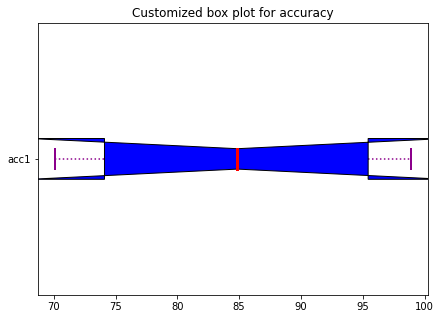

In [ ]:
import matplotlib.pyplot as plt
accuracy = [acc1, acc2, acc3, acc4]
 
fig = plt.figure(figsize =(7, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(accuracy, patch_artist = True,notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D', color ='#e7298a', alpha = 0.5)
    
# x-axis labels
ax.set_yticklabels(['acc1', 'acc2', 'acc3', 'acc4'])
 
# Adding title
plt.title("Customized box plot for accuracy")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

REFERENCES:
1. https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
2. https://scikit-learn.org/stable/modules/ensemble.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
4. https://pbpython.com/categorical-encoding.html
5. https://pypi.org/project/lazypredict/